# THE SPARK FOUNDATION
# TASK 1 - PREDICTION USING SUPERVISED ML

# SUBMITTED BY : JUHY
 


# * Predicting the percentage of an student based on the no. of study hours

# IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




# Reading the data from 

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

# Reading the first five values of dataset

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Description of dataset

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data visualization : Plotting the distribution of scores

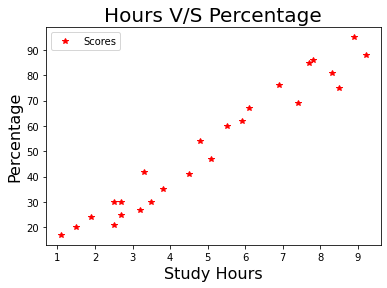

In [5]:
data.plot(x="Hours", y="Scores",style='*',color='r')
plt.title('Hours V/S Percentage',fontsize=20)
plt.xlabel("Study Hours",fontsize=16)
plt.ylabel("Percentage",fontsize=16)
plt.show()


# Preparing the data : The next step is to divide the data into attributes and labels that is inputs and outputs

In [6]:
X=data.iloc[:, :-1].values
Y=data.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# Training the simple regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)



LinearRegression()

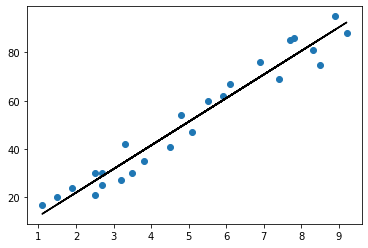

In [10]:
#PLOTTING THE REGRESSION LINE
line=regressor.coef_*X+regressor.intercept_

#PLOTTING FOR THE TEST DATA
plt.scatter(X,Y)
plt.plot(X,line,color='k')
plt.show()


# Making predictions

In [11]:
Y_pred=regressor.predict(X_test)
print(Y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


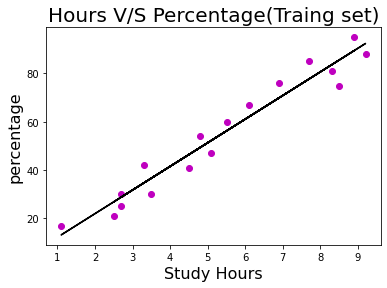

In [12]:
#Visualising the Training set results
plt.scatter(X_train, Y_train, color='m')
plt.plot(X_train,regressor.predict(X_train),color='k')
plt.title('Hours V/S Percentage(Traing set)',fontsize=20)
plt.xlabel('Study Hours',fontsize=16)
plt.ylabel('percentage',fontsize=16)
plt.show()

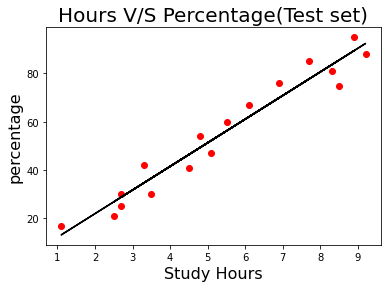

In [13]:
#Visualising the Test set results
plt.scatter(X_train, Y_train, color='r')
plt.plot(X_train,regressor.predict(X_train),color='k')
plt.title('Hours V/S Percentage(Test set)',fontsize=20)
plt.xlabel('Study Hours',fontsize=16)
plt.ylabel('percentage',fontsize=16)
plt.show()

In [14]:
#Comparing the actual values with the predicted values
data=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
data
                  

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [15]:
#PREDICTING THE SCORE
data=np.array(9.25)
data=data.reshape(-1,1)
pred=regressor.predict(data)
print("If the student studis for 9.25 hours/day , the score is {}".format(pred))

If the student studis for 9.25 hours/day , the score is [92.91505723]


# Evaluating the Model


In [16]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 4.419727808027652


In [17]:
from sklearn.metrics import r2_score
print("The R-Square of my model is:",r2_score(Y_test,Y_pred))

The R-Square of my model is: 0.9568211104435257


# CONCLUSION : We used a linear regression model to predict the score of student if she/he studies for 9.25 hours/day and the predicted score came out to ve 92.91